In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc
import seaborn as sns
from tqdm import tqdm
from matplotlib.colors import rgb2hex
from scipy import stats
from scipy.stats import ranksums

In [108]:
from src.loki.analysis.alignment_neighbor import *
from src.loki.tools.pca_fit import *

In [109]:
def get_features(sample_name, feature_type, case_name):
    features_path=os.path.join(case_dir_omiclip, sample_name+feature_type+case_name+'.csv')
    features = pd.read_csv(features_path, index_col=0, header = None)

    return features

In [110]:
data_dir = '/condo/wanglab/shared/wxc/clip/data/human/ST_data/data31_spatial_fresh_frozen_35sample/'

In [111]:
case_dir = '/condo/wanglab/shared/wxc/clip/data/human/ST_data/simulation_data/case_study/data31_spatial_fresh_frozen_35sample/'

In [112]:
case_dir_omiclip = case_dir+'omiclip/'

In [113]:
paste_path = case_dir+'paste/'

In [130]:
src_sample_list = [
    'V10F24-048_A1_rotate90',
    'V10F24-048_B1_rotate90',
    'V10F24-048_C1',
    'V10F24-048_D1',
    # 'V10F24-050_A1',
    'V10F24-050_B1',
    'V10F24-050_C1',
    'V10F24-050_D1',
]

In [115]:
tar_sample_name = 'V10F24-050_A1'
ad_tar_raw = sc.read_h5ad(os.path.join(data_dir, tar_sample_name+'.h5ad'))
ad_tar_raw.var_names_make_unique()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# Combine Stats

In [80]:
all_mse = pd.DataFrame()
for src_sample in src_sample_list:
    mse = pd.read_csv(case_dir+src_sample+'_all_mse.csv', index_col=0)
    all_mse = pd.concat([all_mse,mse], axis=0)
all_mse

,omiclip_st,omiclip_img_ft,gpsa,paste
MT-ND4,0.222787,0.187662,0.271534,0.221367
MT-CO3,0.203768,0.198899,0.249004,0.218473
MYL9,0.169981,0.180659,0.274854,0.239003
CTSD,0.309767,0.260716,0.261073,0.292670
NACA,0.106571,0.099499,0.168565,0.125534
...,...,...,...,...
FAM3C,0.008765,0.008247,0.015521,0.011452
TMEM159,0.009557,0.010681,0.012769,0.013537
DNAJC4,0.009391,0.008541,0.017428,0.011843
TADA3,0.010643,0.010504,0.012542,0.012552


<Axes: >

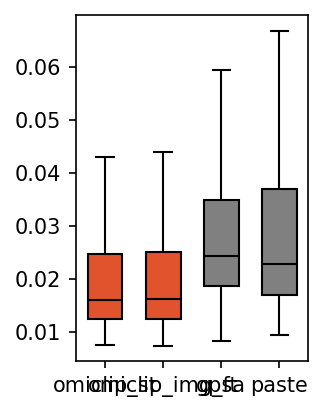

In [106]:
plt.figure(figsize=(2,3), dpi=150)
# sns.boxplot(all_mse, showfliers=False, width=0.6, linecolor = 'black', linewidth=1, color='white')
sns.boxplot(all_mse, showfliers=False, width=0.6, linecolor = 'black', linewidth=1, palette=['#FE420F','#FE420F','grey', 'grey'],)
# plt.ylim((0.05,0.4))

# 3D plot

In [116]:
case_name = '_coca_after_training20'

In [117]:
feature_type = '_coca_txt_features'
tar_features = get_features(tar_sample_name, feature_type, case_name)

In [118]:
src_sample_name = src_sample_list[0]
src_features = get_features(src_sample_name, feature_type, case_name)

In [119]:
pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)

In [120]:
pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]

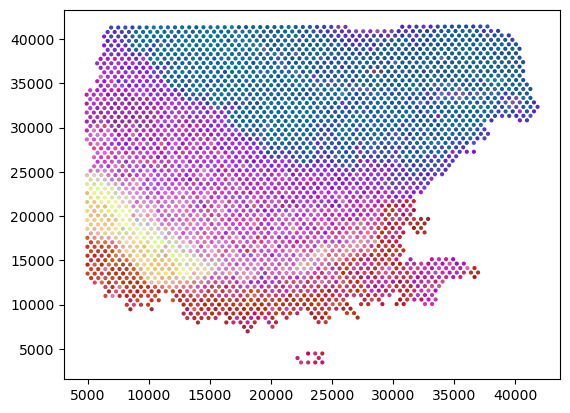

In [121]:
plt.scatter(ad_tar_raw.obsm['spatial'][:,0], ad_tar_raw.obsm['spatial'][:,1], s=4, marker='o', c=pca_hex_comb[:len(tar_features.T)])

## Raw stack

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

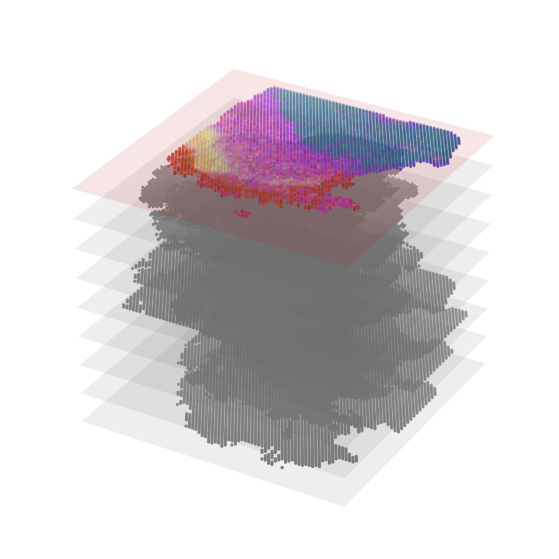

In [127]:
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(ad_tar_raw.obsm['spatial'][:,0], ad_tar_raw.obsm['spatial'][:,1], 0, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0

xx = np.array([[0-2000, ad_tar_raw.obsm['spatial'].max()+2000]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)
for src_sample_name in src_sample_list:
    i=i+0.2
    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(ad_src.obsm['spatial'][:,0], ad_src.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(ad_src.obsm['spatial'][:,0], ad_src.obsm['spatial'][:,1], i, marker='o', s=s, c='grey')

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

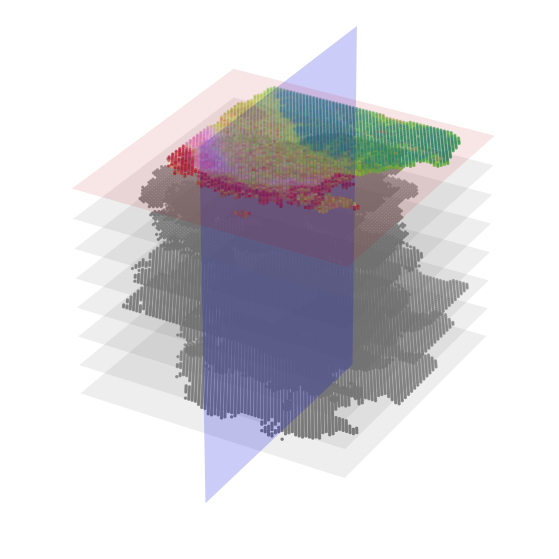

In [35]:
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(ad_tar_raw.obsm['spatial'][:,0], ad_tar_raw.obsm['spatial'][:,1], 0, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0
zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
xx = yy*0+20000
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[0-2000, ad_tar_raw.obsm['spatial'].max()+2000]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in src_sample_list:
    i=i+0.2
    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(ad_src.obsm['spatial'][:,0], ad_src.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(ad_src.obsm['spatial'][:,0], ad_src.obsm['spatial'][:,1], i, marker='o', s=s, c='grey')

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

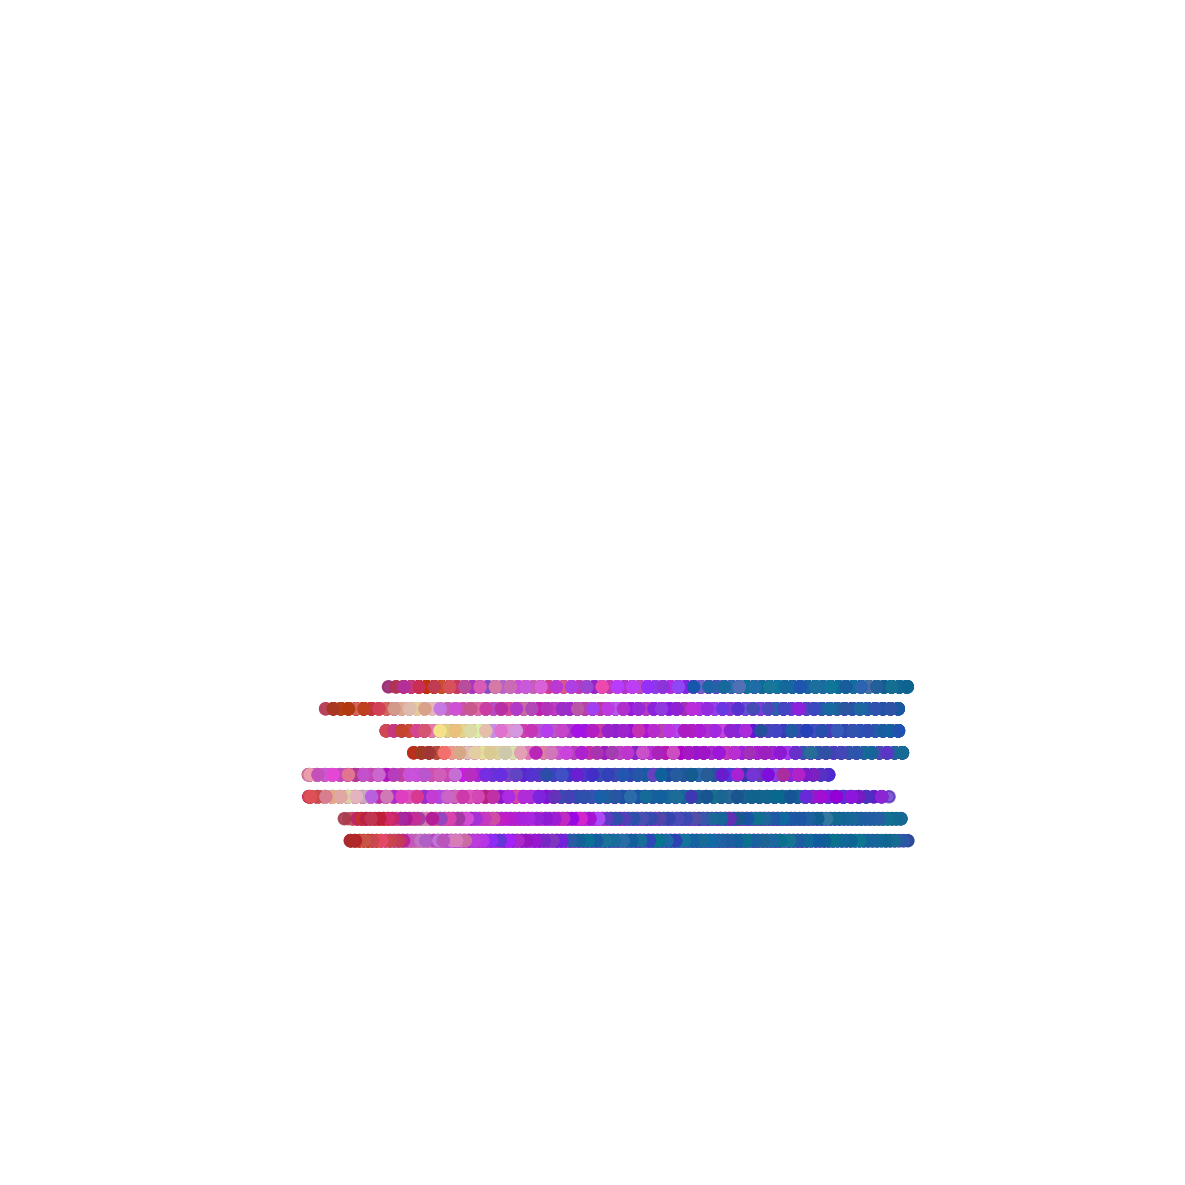

In [135]:
s=30
i=0.1
fig = plt.figure(figsize = (10, 10), dpi=150)
ax = plt.axes(projection ="3d", proj_type='ortho') 

ad_tar_raw.obsm['spatial']=ad_tar_raw.obsm['spatial'].astype('float')
ad_tar_raw.obsm['spatial'][:,0][ad_tar_raw.obsm['spatial'][:,0]>20000]=np.nan
ax.scatter3D(ad_tar_raw.obsm['spatial'][:,0], ad_tar_raw.obsm['spatial'][:,1], 0.5, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0.1
for src_sample_name in src_sample_list:
    i=i+0.05
    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]

    ad_src.obsm['spatial']=ad_src.obsm['spatial'].astype('float')
    ad_src.obsm['spatial'][:,0][ad_src.obsm['spatial'][:,0]>20000]=np.nan
    ax.scatter3D(ad_src.obsm['spatial'][:,0], ad_src.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
# print(i)
ax.set_zlim(0, 1.5)
ax.set_xlim(0, 20000)
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=0, azim=0)
# ax.view_init(0, 360)
ax.grid(False)
ax.set_axis_off()
plt.show()

## Omiclip ST Stack

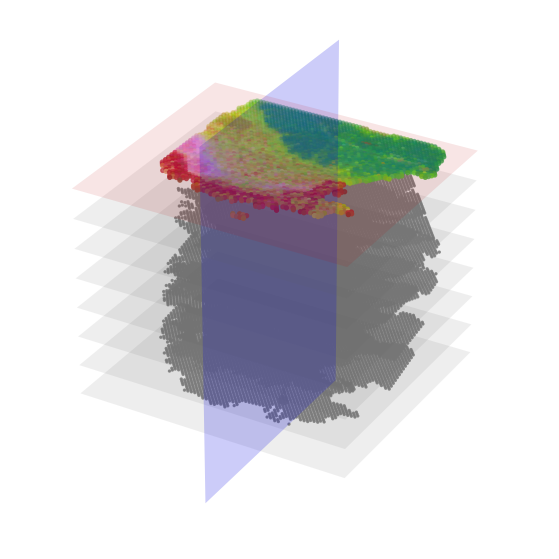

In [49]:
omiclip_ad_tar = ad_tar_raw.copy()
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], omiclip_ad_tar.obsm['spatial'][:,1], 0, marker='o', s=8, c=pca_hex_comb[:len(tar_features.T)])
i=0
zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
xx = yy*0+20000
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[0-2000, ad_tar_raw.obsm['spatial'].max()+2000]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in src_sample_list:
    i=i+0.2
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_st_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

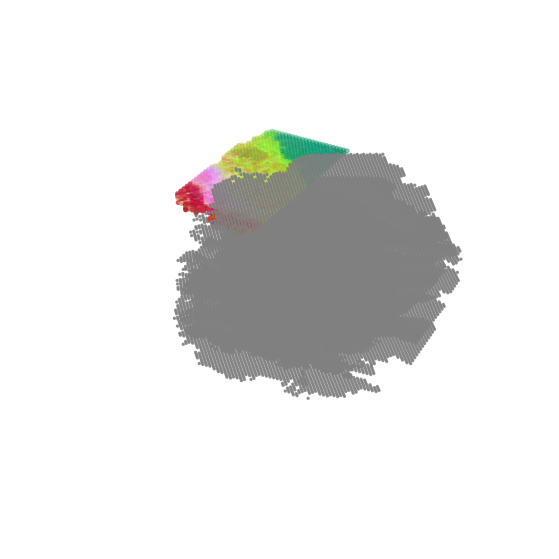

In [40]:
omiclip_ad_tar = ad_tar_raw.copy()
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], omiclip_ad_tar.obsm['spatial'][:,1], 0, marker='o', s=8, c=pca_hex_comb[:len(tar_features.T)])
i=0

xx = np.array([[0-5000, omiclip_ad_tar.obsm['spatial'].max()+5000]])
yy = np.array([[0-5000],[omiclip_ad_tar.obsm['spatial'].max()+5000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
for src_sample_name in src_sample_list:
    i=i+0.2
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_st_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.set_box_aspect(aspect = (1,1,0.5))
ax.grid(False)
ax.set_axis_off()
plt.show()

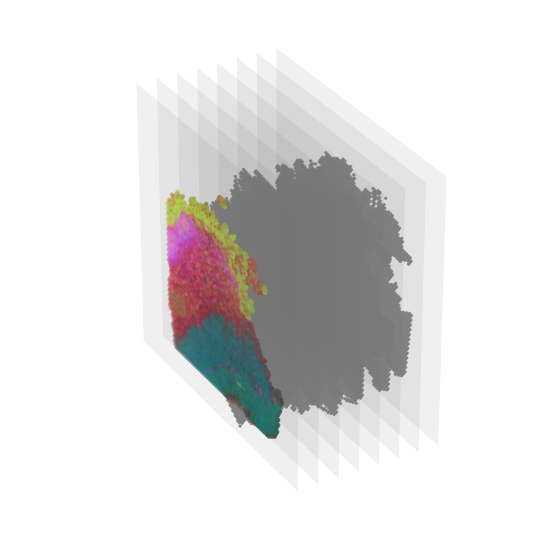

In [84]:
omiclip_ad_tar = ad_tar_raw.copy()
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], 0,  omiclip_ad_tar.obsm['spatial'][:,1], marker='o', s=5, c=pca_hex_comb[:len(tar_features.T)])
i=0

xx = np.array([[0-5000, omiclip_ad_tar.obsm['spatial'].max()+5000]])
yy = np.array([[0-5000],[omiclip_ad_tar.obsm['spatial'].max()+5000]])
zz = yy*0+i
ax.plot_surface(xx, zz, yy, color='grey', alpha=0.1)
for src_sample_name in src_sample_list:
    i=i+0.2
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_st_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], i, omiclip_ad_src_align_st.obsm['spatial'][:,1], marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, zz, yy, color='grey', alpha=0.1)
# ax.set_ylim(0, 1.5)
ax.invert_zaxis()
ax.set_box_aspect(aspect = (1,0.5,1))
ax.view_init(elev=None, azim=-30)
ax.grid(False)
ax.set_axis_off()
plt.show()

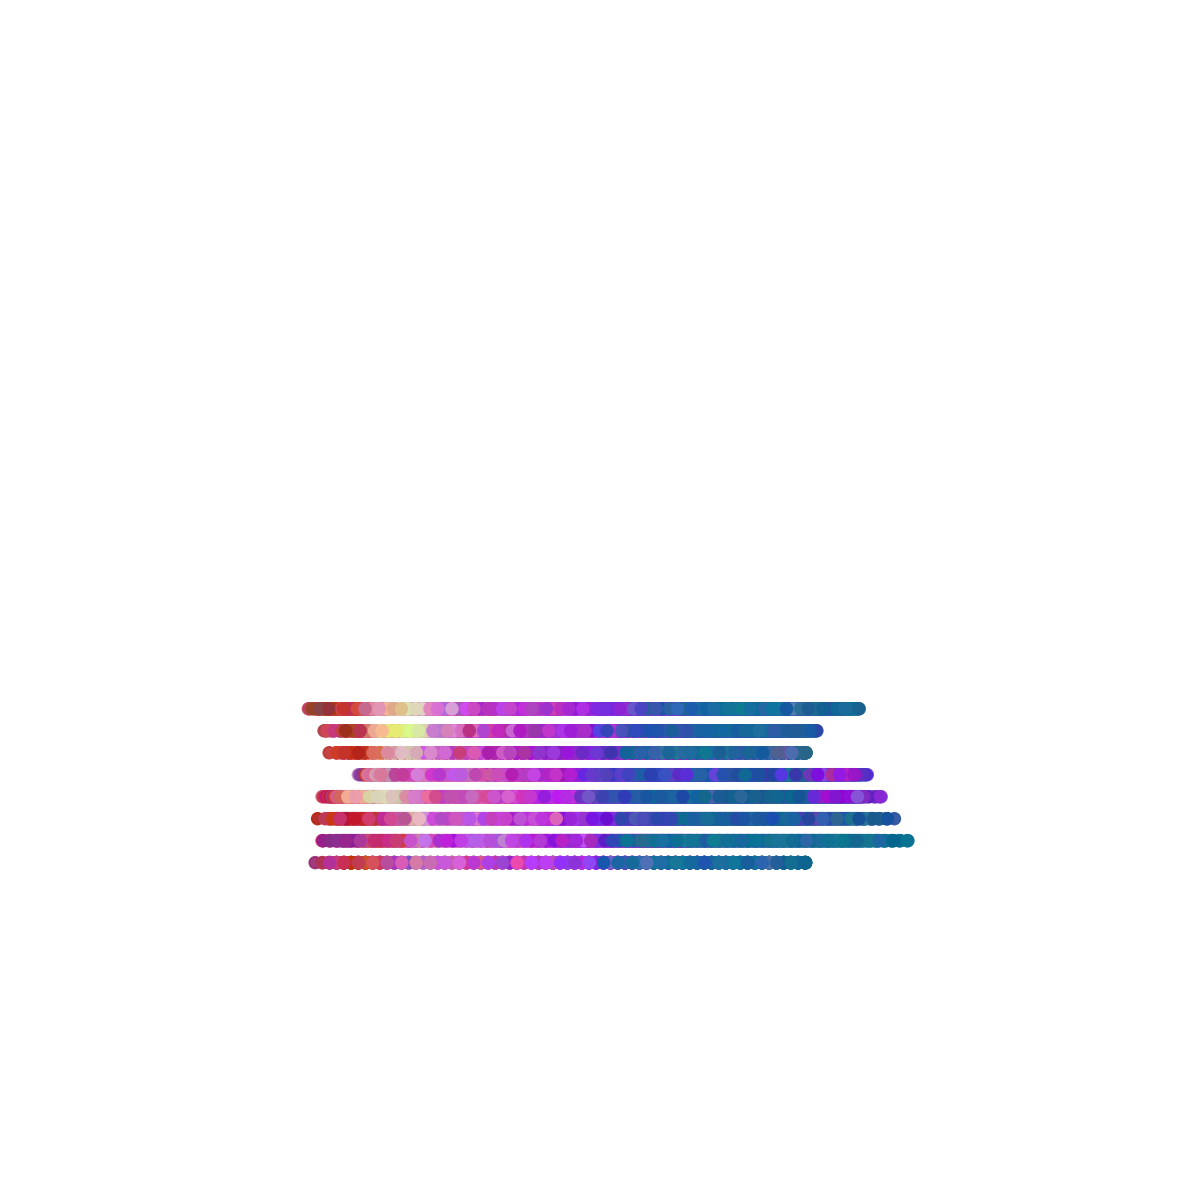

In [63]:
omiclip_ad_tar = ad_tar_raw.copy()
s=30
i=0.1
fig = plt.figure(figsize = (10, 10), dpi=150)
ax = plt.axes(projection ="3d", proj_type='ortho') 

omiclip_ad_tar.obsm['spatial']=omiclip_ad_tar.obsm['spatial'].astype('float')
omiclip_ad_tar.obsm['spatial'][:,0][omiclip_ad_tar.obsm['spatial'][:,0]>20000]=np.nan
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], omiclip_ad_tar.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0.1
for src_sample_name in src_sample_list:
    i=i+0.05
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_st_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]

    omiclip_ad_src_align_st.obsm['spatial'][:,0][omiclip_ad_src_align_st.obsm['spatial'][:,0]>20000]=np.nan
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
ax.set_zlim(0, 1.5)
ax.set_xlim(0, 20000)
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=0, azim=0)
# ax.view_init(0, 360)
ax.grid(False)
ax.set_axis_off()
plt.show()

## Omiclip Img Stack

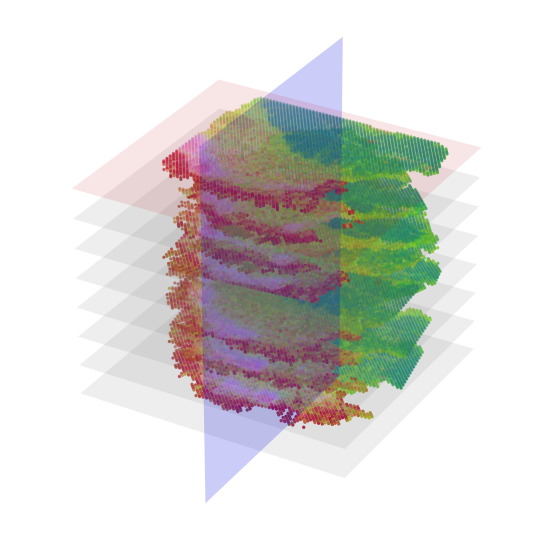

In [26]:
omiclip_ad_tar = ad_tar_raw.copy()
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], omiclip_ad_tar.obsm['spatial'][:,1], 0, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0
zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
xx = yy*0+20000
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[0-2000, ad_tar_raw.obsm['spatial'].max()+2000]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in src_sample_list:
    i=i+0.2
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_img_finetune10_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

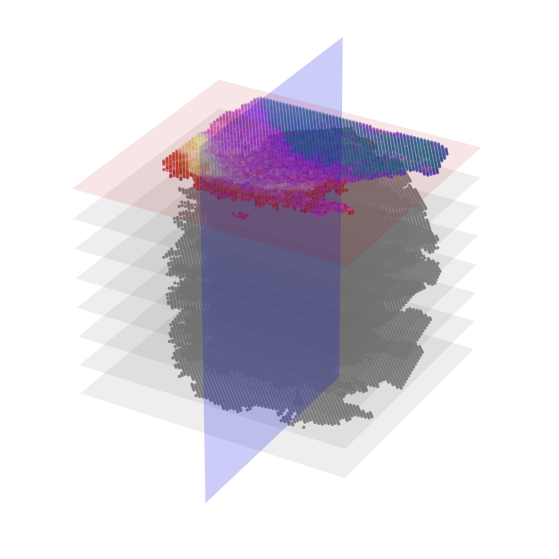

In [79]:
omiclip_ad_tar = ad_tar_raw.copy()
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], omiclip_ad_tar.obsm['spatial'][:,1], 0, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0
zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
xx = yy*0+20000
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[0-2000, ad_tar_raw.obsm['spatial'].max()+2000]])
yy = np.array([[0-2000],[ad_tar_raw.obsm['spatial'].max()+2000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in src_sample_list:
    i=i+0.2
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_img_finetune10_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

In [50]:
feature_type = '_coca_txt_features'
tar_features = get_features(tar_sample_name, feature_type, case_name)

In [51]:
src_sample_name = src_sample_list[0]
src_features = get_features(src_sample_name, feature_type, case_name)

In [52]:
pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)

In [53]:
pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]

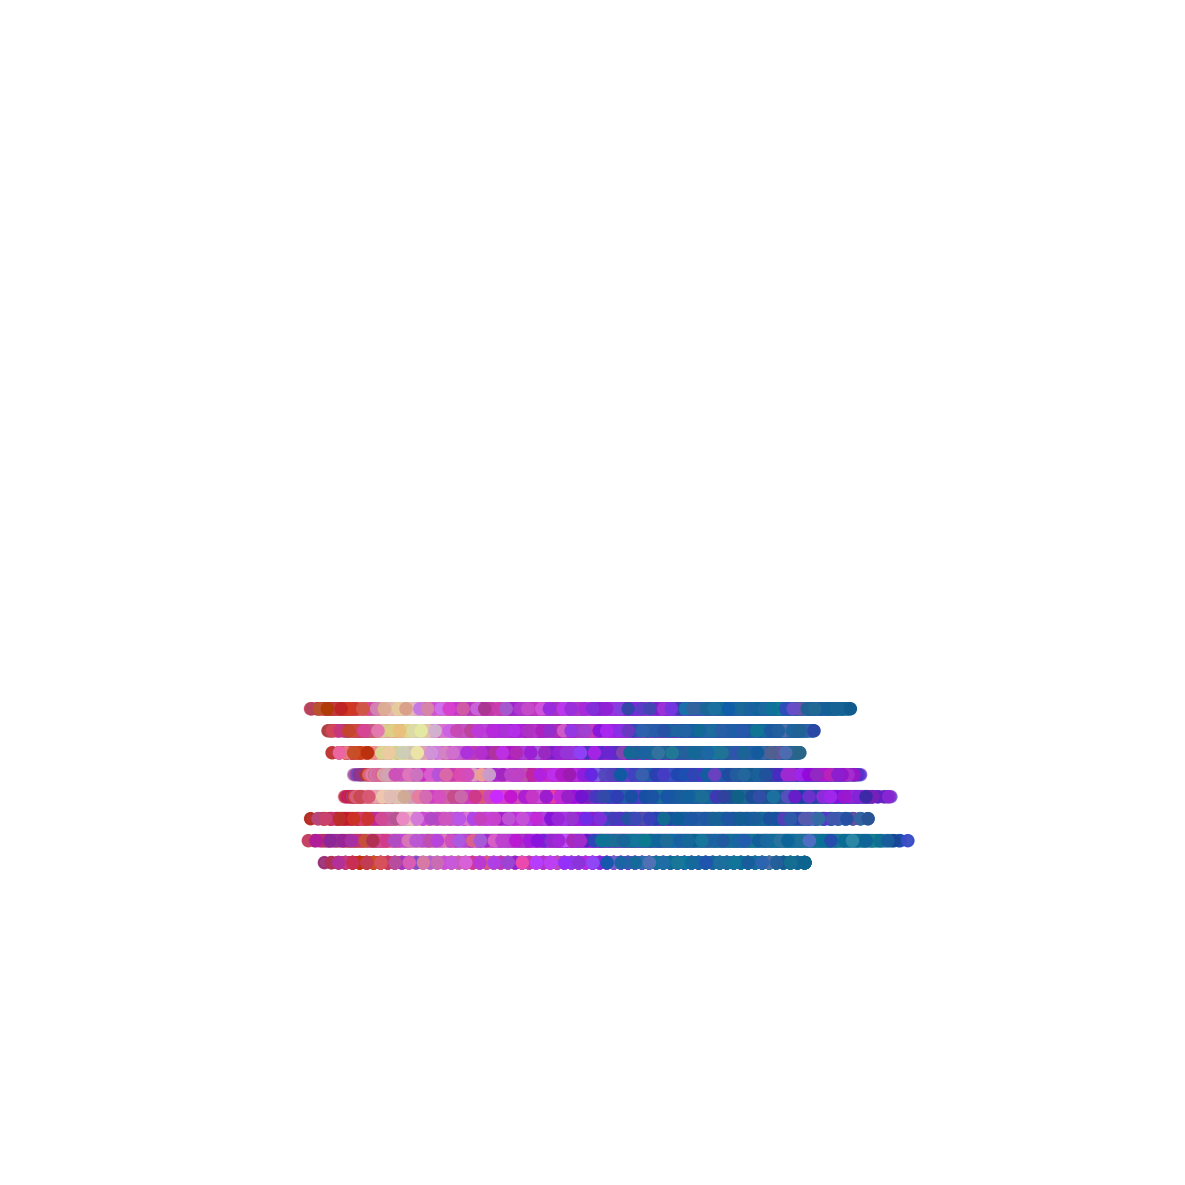

In [65]:
omiclip_ad_tar = ad_tar_raw.copy()
s=30
i=0.1
fig = plt.figure(figsize = (10, 10), dpi=150)
ax = plt.axes(projection ="3d", proj_type='ortho') 
omiclip_ad_tar.obsm['spatial']=omiclip_ad_tar.obsm['spatial'].astype('float')
omiclip_ad_tar.obsm['spatial'][:,0][omiclip_ad_tar.obsm['spatial'][:,0]>20000]=np.nan
ax.scatter3D(omiclip_ad_tar.obsm['spatial'][:,0], omiclip_ad_tar.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[:len(tar_features.T)])
i=0.1
for src_sample_name in src_sample_list:
    i=i+0.05
    omiclip_ad_src_align_st = sc.read_h5ad(case_dir_omiclip+'omiclip_st_img_finetune10_'+src_sample_name+'.h5ad')
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]

    omiclip_ad_src_align_st.obsm['spatial'][:,0][omiclip_ad_src_align_st.obsm['spatial'][:,0]>20000]=np.nan
    ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
ax.set_zlim(0, 1.5)
ax.set_xlim(0, 20000)
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=0, azim=0)
# ax.view_init(0, 360)
ax.grid(False)
ax.set_axis_off()
plt.show()

## Paste Stack

In [66]:
paste_tar_ad = sc.read_h5ad(paste_path+'paste_aligment_target_'+src_sample_name+'.h5ad')

In [67]:
paste_shared_index_tar = find_matching_indices(ad_tar_raw.obs.index.to_list(), paste_tar_ad.obs.index.to_list())

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

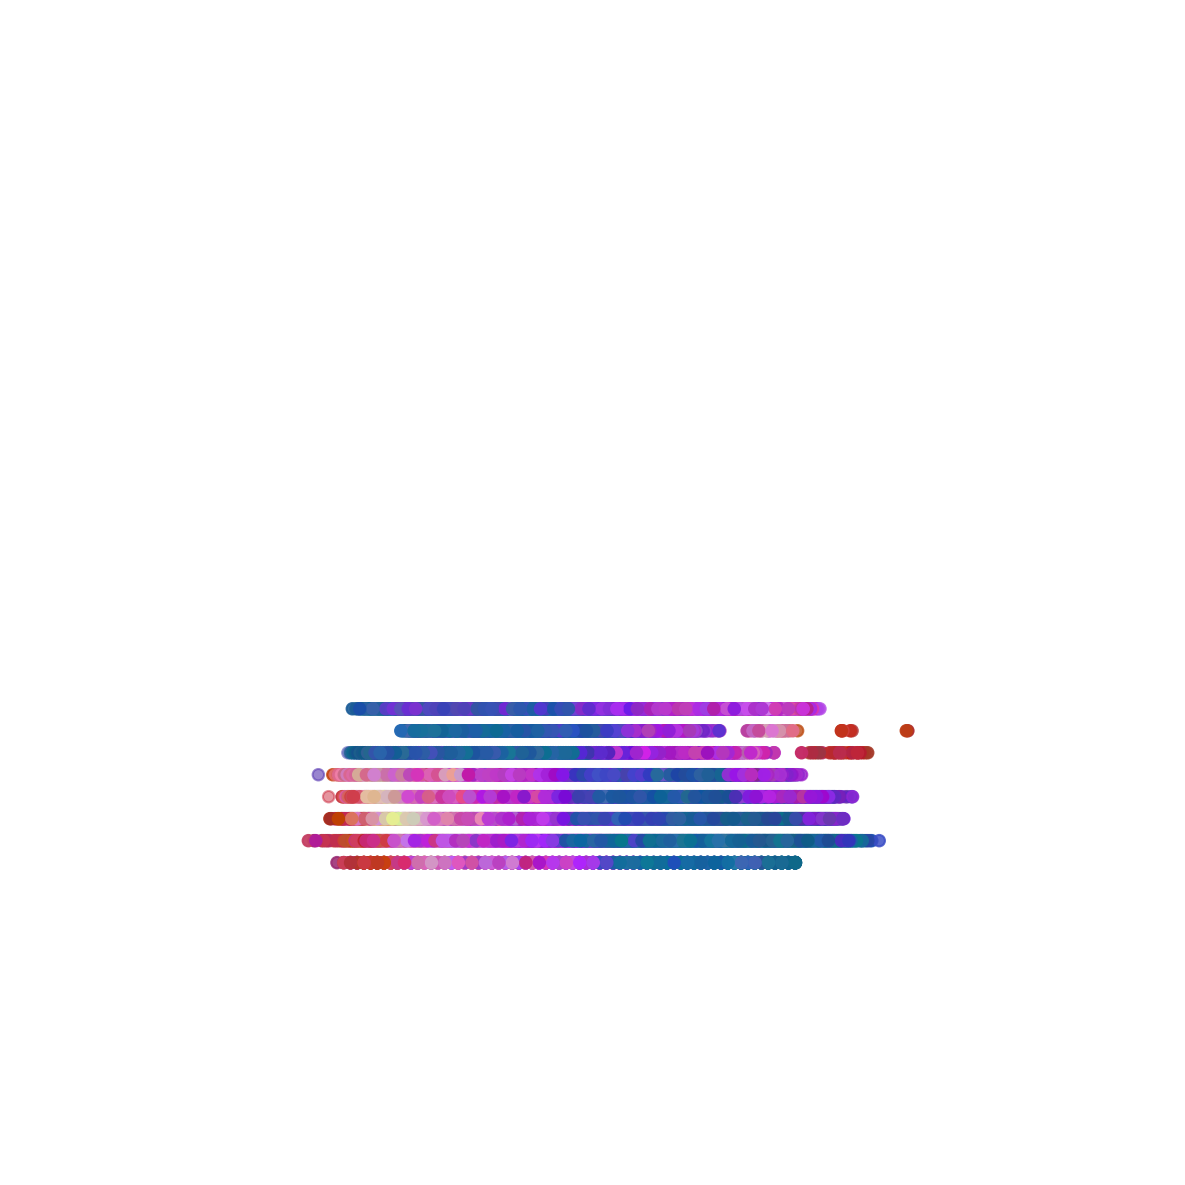

In [68]:
s=30
i=0.1
fig = plt.figure(figsize = (10, 10), dpi=150)
ax = plt.axes(projection ="3d", proj_type='ortho') 

paste_tar_ad.obsm['spatial'][:,0][paste_tar_ad.obsm['spatial'][:,0]>0]=np.nan
ax.scatter3D(paste_tar_ad.obsm['spatial'][:,0], paste_tar_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[:len(tar_features.T)][i] for i in paste_shared_index_tar[:,0]])
for src_sample_name in src_sample_list:
    i=i+0.05
    paste_align_ad = sc.read_h5ad(paste_path+'paste_aligment_source_'+src_sample_name+'.h5ad')
    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    paste_shared_index = find_matching_indices(ad_src.obs.index.to_list(), paste_align_ad.obs.index.to_list())
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    
    paste_align_ad.obsm['spatial'][:,0][paste_align_ad.obsm['spatial'][:,0]>0]=np.nan
    ax.scatter3D(paste_align_ad.obsm['spatial'][:,0], paste_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[len(tar_features.T):][i] for i in paste_shared_index[:,0]])
ax.set_zlim(0, 1.5)
ax.set_xlim(0, 20000)
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=0, azim=0)
# ax.view_init(0, 360)
ax.grid(False)
ax.set_axis_off()
plt.show()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/sit

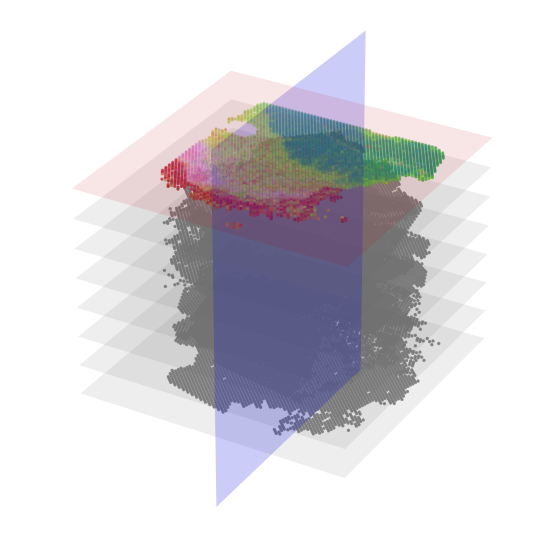

In [29]:
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(paste_tar_ad.obsm['spatial'][:,0], paste_tar_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[:len(tar_features.T)][i] for i in paste_shared_index_tar[:,0]])
i=0
zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[paste_tar_ad.obsm['spatial'].min()-2000],[paste_tar_ad.obsm['spatial'].max()+2000]])
xx = yy*0+0
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[paste_tar_ad.obsm['spatial'].min()-2000, paste_tar_ad.obsm['spatial'].max()+2000]])
yy = np.array([[paste_tar_ad.obsm['spatial'].min()-2000],[paste_tar_ad.obsm['spatial'].max()+2000]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in src_sample_list:
    i=i+0.2
    paste_align_ad = sc.read_h5ad(paste_path+'paste_aligment_source_'+src_sample_name+'.h5ad')
    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    paste_shared_index = find_matching_indices(ad_src.obs.index.to_list(), paste_align_ad.obs.index.to_list())
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(paste_align_ad.obsm['spatial'][:,0], paste_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

## GPSA stack

In [69]:
gpsa_tar_ad = sc.read_h5ad(case_dir+'gpsa/gpsa_target_'+src_sample_name+'.h5ad')
gpsa_tar = pd.read_csv(case_dir+'gpsa/gpsa_tar_coor_'+src_sample_name+'.csv', index_col=0)
gpsa_tar = np.array(gpsa_tar)
gpsa_tar_ad.obsm['spatial'] = gpsa_tar
gpsa_shared_index_tar = find_matching_indices(ad_tar_raw.obs.index.to_list(), gpsa_tar_ad.obs.index.to_list())

In [70]:
gpsa_src_sample_list = [
    'V10F24-048_A1_rotate90',
    'V10F24-048_B1_rotate90',
    'V10F24-048_C1',
    'V10F24-048_D1',
    # 'V10F24-050_A1',
    'V10F24-050_B1',
    # 'V10F24-050_C1',
    'V10F24-050_D1',
]

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


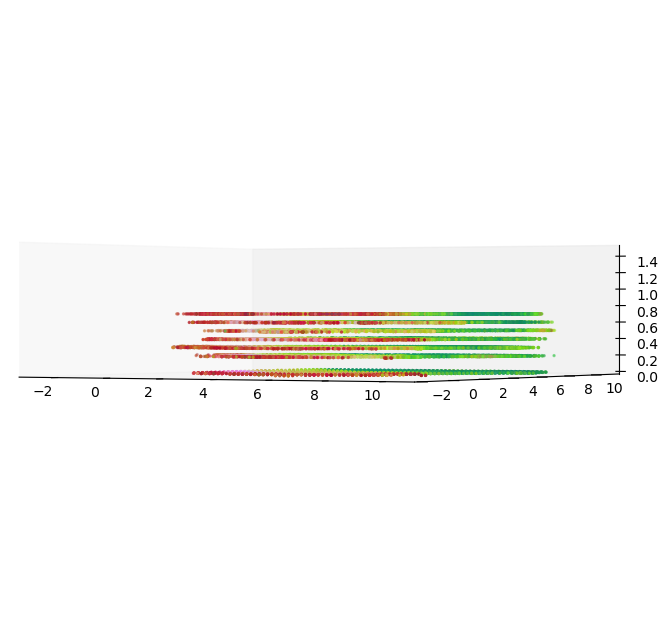

In [34]:
ad_tar = gpsa_tar_ad.copy()
s=2
i=0.1
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(gpsa_tar_ad.obsm['spatial'][:,0], gpsa_tar_ad.obsm['spatial'][:,1], 0, marker='o', s=s, c=[pca_hex_comb[:len(tar_features.T)][i] for i in gpsa_shared_index_tar[:,0]])
for src_sample_name in gpsa_src_sample_list:
    i=i+0.1
    gpsa_align_ad = sc.read_h5ad(case_dir+'gpsa/gpsa_alignment_'+src_sample_name+'.h5ad')
    gpsa_align = pd.read_csv(case_dir+'gpsa/gpsa_align_coor_'+src_sample_name+'.csv', index_col=0)
    gpsa_align = np.array(gpsa_align)
    gpsa_align_ad.obsm['spatial'] = gpsa_align

    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    gpsa_shared_index = find_matching_indices(ad_src.obs.index.to_list(), gpsa_align_ad.obs.index.to_list())
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    ax.scatter3D(gpsa_align_ad.obsm['spatial'][:,0], gpsa_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[len(tar_features.T):][i] for i in gpsa_shared_index[:,0]])
ax.set_zlim(0, 1.5)
ax.set_box_aspect(aspect = (1,1,0.3))
ax.view_init(elev=0, azim=None)
ax.grid(False)
# ax.grid(axis='x')
plt.show()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


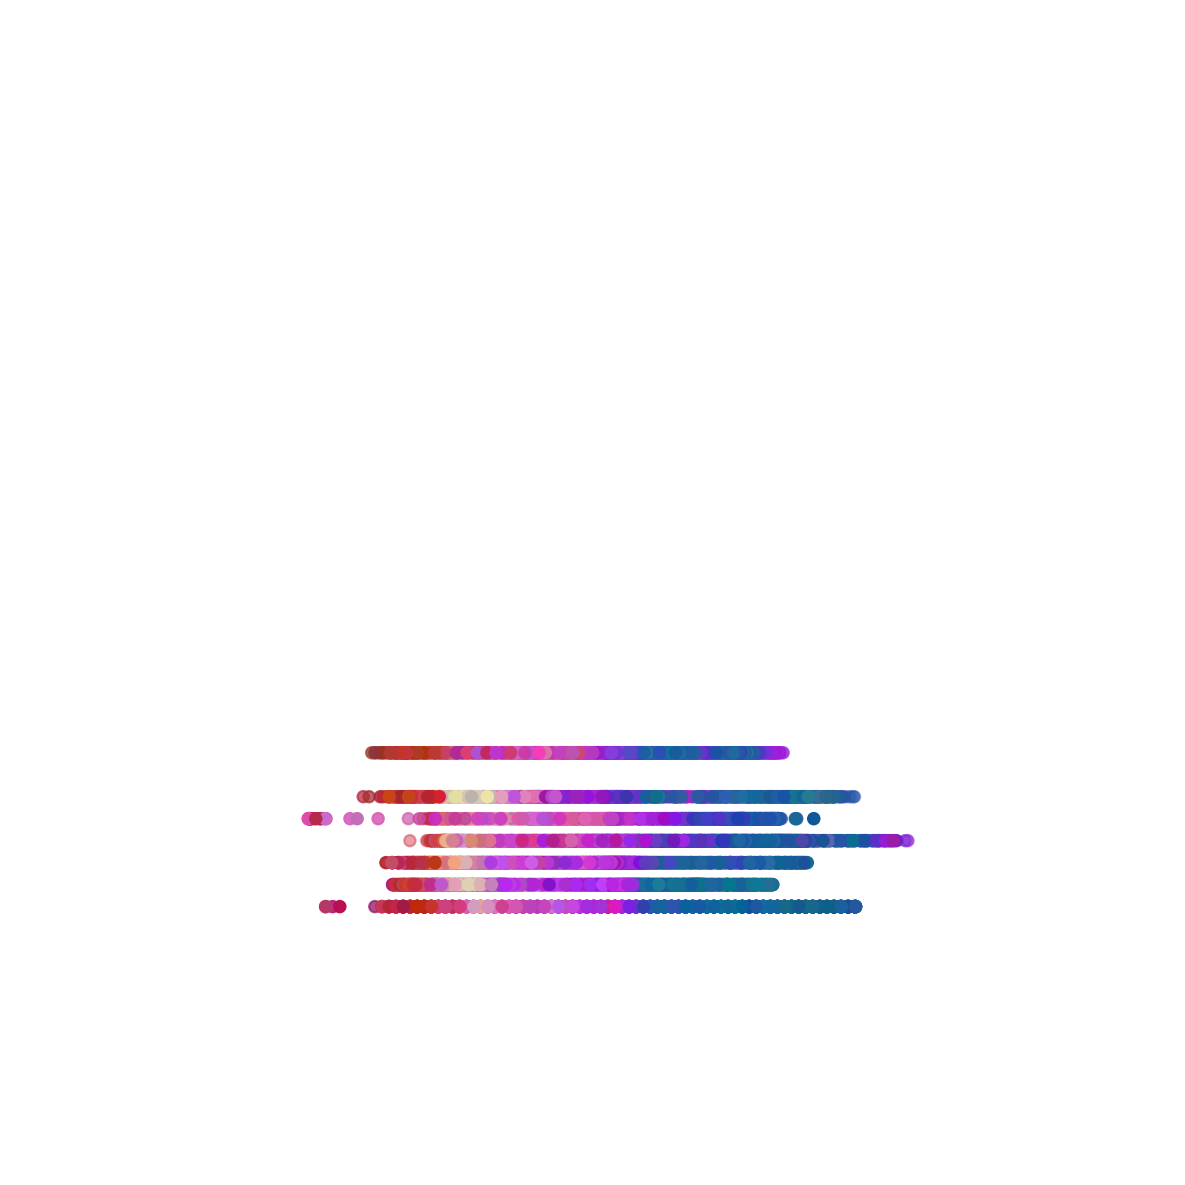

In [122]:
ad_tar = gpsa_tar_ad.copy()
s=30
i=0
fig = plt.figure(figsize = (10, 10), dpi=150)
ax = plt.axes(projection ="3d", proj_type='ortho') 

gpsa_tar_ad.obsm['spatial'][:,0][gpsa_tar_ad.obsm['spatial'][:,0]>5]=np.nan
ax.scatter3D(gpsa_tar_ad.obsm['spatial'][:,0], gpsa_tar_ad.obsm['spatial'][:,1], 0, marker='o', s=s, c=[pca_hex_comb[:len(tar_features.T)][i] for i in gpsa_shared_index_tar[:,0]])
for src_sample_name in src_sample_list:
    i=i+0.05
    if src_sample_name == 'V10F24-050_C1':
        continue
    gpsa_align_ad = sc.read_h5ad(case_dir+'gpsa/gpsa_alignment_'+src_sample_name+'.h5ad')
    gpsa_align = pd.read_csv(case_dir+'gpsa/gpsa_align_coor_'+src_sample_name+'.csv', index_col=0)
    gpsa_align = np.array(gpsa_align)
    gpsa_align_ad.obsm['spatial'] = gpsa_align

    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    gpsa_shared_index = find_matching_indices(ad_src.obs.index.to_list(), gpsa_align_ad.obs.index.to_list())
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]

    gpsa_align_ad.obsm['spatial'][:,0][gpsa_align_ad.obsm['spatial'][:,0]>5]=np.nan
    ax.scatter3D(gpsa_align_ad.obsm['spatial'][:,0], gpsa_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[len(tar_features.T):][i] for i in gpsa_shared_index[:,0]])
ax.set_zlim(0, 1.5)
ax.set_xlim(0, 20000)
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=0, azim=0)
# ax.view_init(0, 360)
ax.grid(False)
ax.set_axis_off()
plt.show()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


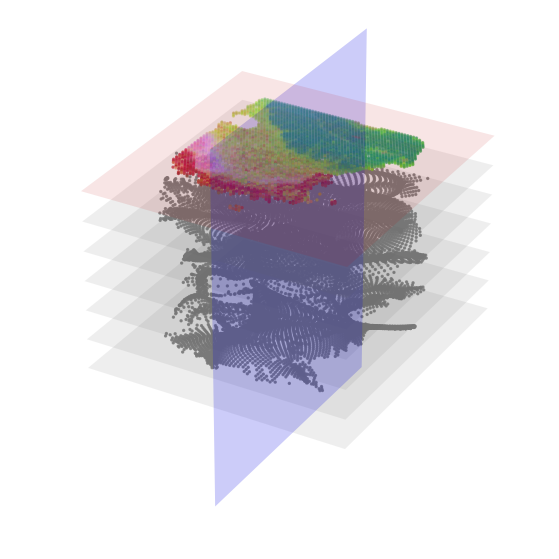

In [39]:
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
i=0
ax.scatter3D(gpsa_tar_ad.obsm['spatial'][:,0], gpsa_tar_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[:len(tar_features.T)][i] for i in gpsa_shared_index_tar[:,0]])

zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[gpsa_tar_ad.obsm['spatial'].min()-2],[gpsa_tar_ad.obsm['spatial'].max()+2]])
xx = yy*0+5
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[gpsa_tar_ad.obsm['spatial'].min()-2, gpsa_tar_ad.obsm['spatial'].max()+2]])
yy = np.array([[gpsa_tar_ad.obsm['spatial'].min()-2],[gpsa_tar_ad.obsm['spatial'].max()+2]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in gpsa_src_sample_list:
    i=i+0.2
    gpsa_align_ad = sc.read_h5ad(case_dir+'gpsa/gpsa_alignment_'+src_sample_name+'.h5ad')
    gpsa_align = pd.read_csv(case_dir+'gpsa/gpsa_align_coor_'+src_sample_name+'.csv', index_col=0)
    gpsa_align = np.array(gpsa_align)
    gpsa_align_ad.obsm['spatial'] = gpsa_align

    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    gpsa_shared_index = find_matching_indices(ad_src.obs.index.to_list(), gpsa_align_ad.obs.index.to_list())
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    # ax.scatter3D(omiclip_ad_src_align_st.obsm['spatial'][:,0], omiclip_ad_src_align_st.obsm['spatial'][:,1], i, marker='o', s=s, c=pca_hex_comb[len(tar_features.T):])
    ax.scatter3D(gpsa_align_ad.obsm['spatial'][:,0], gpsa_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()

/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/condo/wanglab/hmaiwxc/anaconda3/envs/clip/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


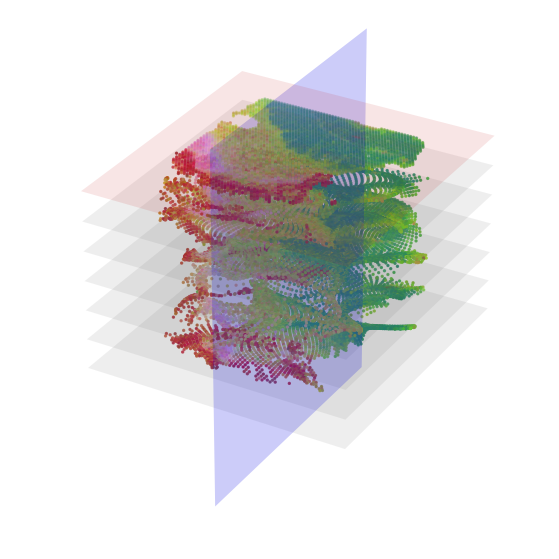

In [43]:
s=2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
i=0
ax.scatter3D(gpsa_tar_ad.obsm['spatial'][:,0], gpsa_tar_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[:len(tar_features.T)][i] for i in gpsa_shared_index_tar[:,0]])

zz = np.array([[0-0.5, 1.4+0.5]])
yy = np.array([[gpsa_tar_ad.obsm['spatial'].min()-2],[gpsa_tar_ad.obsm['spatial'].max()+2]])
xx = yy*0+5
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)

xx = np.array([[gpsa_tar_ad.obsm['spatial'].min()-2, gpsa_tar_ad.obsm['spatial'].max()+2]])
yy = np.array([[gpsa_tar_ad.obsm['spatial'].min()-2],[gpsa_tar_ad.obsm['spatial'].max()+2]])
zz = yy*0+i
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

for src_sample_name in gpsa_src_sample_list:
    i=i+0.2
    gpsa_align_ad = sc.read_h5ad(case_dir+'gpsa/gpsa_alignment_'+src_sample_name+'.h5ad')
    gpsa_align = pd.read_csv(case_dir+'gpsa/gpsa_align_coor_'+src_sample_name+'.csv', index_col=0)
    gpsa_align = np.array(gpsa_align)
    gpsa_align_ad.obsm['spatial'] = gpsa_align

    ad_src = sc.read_h5ad(os.path.join(data_dir, src_sample_name+'.h5ad'))
    gpsa_shared_index = find_matching_indices(ad_src.obs.index.to_list(), gpsa_align_ad.obs.index.to_list())
    src_features = get_features(src_sample_name, feature_type, case_name)
    pca_comb_features, pca_comb_features_batch = get_pca_by_fit(tar_features, src_features)
    pca_rgb_comb = (pca_comb_features-pca_comb_features.min(axis=0))/(pca_comb_features.max(axis=0)-pca_comb_features.min(axis=0))
    pca_rgb_comb[:,[0,1,2]]=pca_rgb_comb[:,[0,2,1]]
    pca_hex_comb = [ rgb2hex(pca_rgb_comb[i,:]) for i in range(pca_rgb_comb.shape[0]) ]
    ax.scatter3D(gpsa_align_ad.obsm['spatial'][:,0], gpsa_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c=[pca_hex_comb[len(tar_features.T):][i] for i in gpsa_shared_index[:,0]], alpha=0.8)
    # ax.scatter3D(gpsa_align_ad.obsm['spatial'][:,0], gpsa_align_ad.obsm['spatial'][:,1], i, marker='o', s=s, c='grey', alpha=0.8)

    zz = yy*0+i
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.1)
ax.set_zlim(0, 1.5)
ax.invert_zaxis()
ax.grid(False)
ax.set_axis_off()
plt.show()